Title: Forest Fires<br>
Number of Instances: 517<br>
Number of Attributes: 12 + output attribute<br>

Attribute information:<br>
- X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
- Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
- month - month of the year: "jan" to "dec"
- day - day of the week: "mon" to "sun"
- FFMC - FFMC index from the FWI system: 18.7 to 96.20
- DMC - DMC index from the FWI system: 1.1 to 291.3
- DC - DC index from the FWI system: 7.9 to 860.6
- ISI - ISI index from the FWI system: 0.0 to 56.10
- temp - temperature in Celsius degrees: 2.2 to 33.30
- RH - relative humidity in %: 15.0 to 100
- wind - wind speed in km/h: 0.40 to 9.40
- rain - outside rain in mm/m2 : 0.0 to 6.4
- area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform)
Missing Attribute Values: None

### Exploratory Data Analysis

In [558]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint


forestdata=pd.read_csv('forestfires.csv')
forestdata

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [559]:
forestdata.describe(include='all') # basic statistical characteristics


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


In [560]:
df1=pd.pivot_table(data=forestdata,values=['rain','temp','wind','RH','area','FFMC','DMC','DC','ISI'],index='month',aggfunc=['mean'])
df1

mean                                                          \
               DC         DMC       FFMC        ISI         RH       area   
month                                                                       
apr     48.555556   15.911111  85.788889   5.377778  46.888889   8.891111   
aug    641.077717  153.732609  92.336957  11.072283  45.489130  12.489076   
dec    351.244444   26.122222  84.966667   3.466667  38.444444  13.330000   
feb     54.670000    9.475000  82.905000   3.350000  55.700000   6.275000   
jan     90.350000    2.400000  50.400000   1.450000  89.000000   0.000000   
jul    450.603125  110.387500  91.328125   9.393750  45.125000  14.369687   
jun    297.705882   93.382353  89.429412  11.776471  45.117647   5.841176   
mar     75.942593   34.542593  89.444444   7.107407  40.000000   4.356667   
may     93.750000   26.700000  87.350000   4.600000  67.000000  19.240000   
nov    106.700000    3.000000  79.500000   1.100000  31.000000   0.000000   
oct    681.673333   41.420000  90.453333   7.146667  37.466667   6.638000   
sep    734.615698  120.922674  91.243023   8.577326  42.843023  17.942616   

                                      
           rain       temp      wind  
month                                 
apr    0.000000  12.044444  4.666667  
aug    0.058696  21.631522  4.086413  
dec    0.000000   4.522222  7.644444  
feb    0.000000   9.635000  3.755000  
jan    0.000000   5.250000  2.000000  
jul    0.006250  22.109375  3.734375  
jun    0.000000  20.494118  4.135294  
mar    0.003704  13.083333  4.968519  
may    0.000000  14.650000  4.450000  
nov    0.000000  11.800000  4.500000  
oct    0.000000  17.093333  3.460000  
sep    0.000000  19.612209  3.557558

In [561]:
df1[('mean','rain')].sort_values(ascending=False).head(4)

month
aug    0.058696
jul    0.006250
mar    0.003704
apr    0.000000
Name: (mean, rain), dtype: float64

In [562]:
df1[('mean','temp')].sort_values(ascending=False).head(4)

month
jul    22.109375
aug    21.631522
jun    20.494118
sep    19.612209
Name: (mean, temp), dtype: float64

In [563]:
df1[('mean','wind')].sort_values(ascending=True).head(4)

month
jan    2.000000
oct    3.460000
sep    3.557558
jul    3.734375
Name: (mean, wind), dtype: float64

Months receiving no rainfall, low humidity is more prone to catch forest fires.<br>
Temp is high in June-Oct.<br>
Wind is low in Jan-Feb, July-Oct.<br>
Humidity is also low in Sep-Dec.<br>
When temp is increases the moisture content of all 3 different types of fuel is reduced leading to more dangerous conditions.<br>

Skew: 12.846933533934868


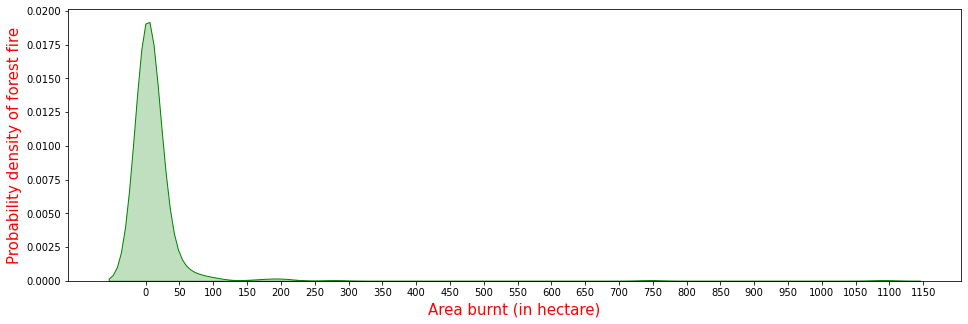

In [564]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(forestdata['area'].skew()))

ax = sns.kdeplot(forestdata['area'],fill=True,color='g')
plt.xlabel('Area burnt (in hectare)',color='red',fontsize=15)
plt.ylabel('Probability density of forest fire',color='red',fontsize=15)
plt.xticks([i for i in range(0,1200,50)])
plt.show()

The data for burnt area is highly skewed.<br>
Majority of the forest fires do not cover a large area.<br>
Also, abnormally high number of the forest fires occur in the month of August and September and least in November.<br>

Text(0, 0.5, 'Y coordinate')

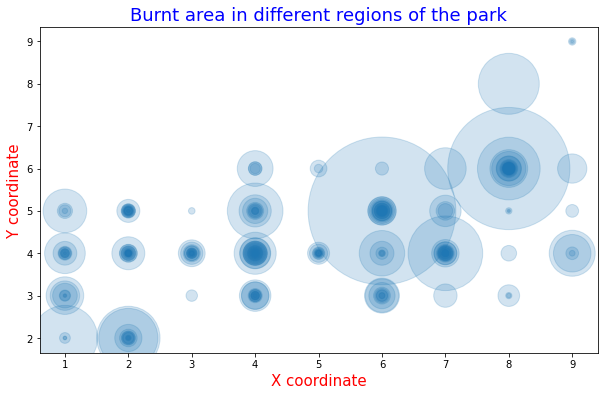

In [565]:
# Analysis of Burnt area based on spatial coordinates(X,Y)

forestdata.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*forestdata['area'],figsize=(10,6))
plt.title('Burnt area in different regions of the park',color='blue',fontsize=18)
plt.xlabel('X coordinate',color='red',fontsize=15)
plt.ylabel('Y coordinate',color='red',fontsize=15)

multiple hotspots for fires<br>
the coordinates (6,5) show intense burnt area

In [566]:
forestdata.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forestdata.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace =True)

In [567]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

Correlation of the Dataset:               X         Y     month       day      FFMC       DMC        DC  \
X      1.000000  0.539548 -0.065003 -0.024922 -0.021039 -0.048384 -0.085916   
Y      0.539548  1.000000 -0.066292 -0.005453 -0.046308  0.007782 -0.101178   
month -0.065003 -0.066292  1.000000 -0.050837  0.291477  0.466645  0.868698   
day   -0.024922 -0.005453 -0.050837  1.000000 -0.041068  0.062870  0.000105   
FFMC  -0.021039 -0.046308  0.291477 -0.041068  1.000000  0.382619  0.330512   
DMC   -0.048384  0.007782  0.466645  0.062870  0.382619  1.000000  0.682192   
DC    -0.085916 -0.101178  0.868698  0.000105  0.330512  0.682192  1.000000   
ISI    0.006210 -0.024488  0.186597  0.032909  0.531805  0.305128  0.229154   
temp  -0.051258 -0.024103  0.368842  0.052190  0.431532  0.469594  0.496208   
RH     0.085223  0.062221 -0.095280  0.092151 -0.300995  0.073795 -0.039192   
wind   0.018798 -0.020341 -0.086368  0.032478 -0.028485 -0.105342 -0.203466   
rain   0.065387  0.03323

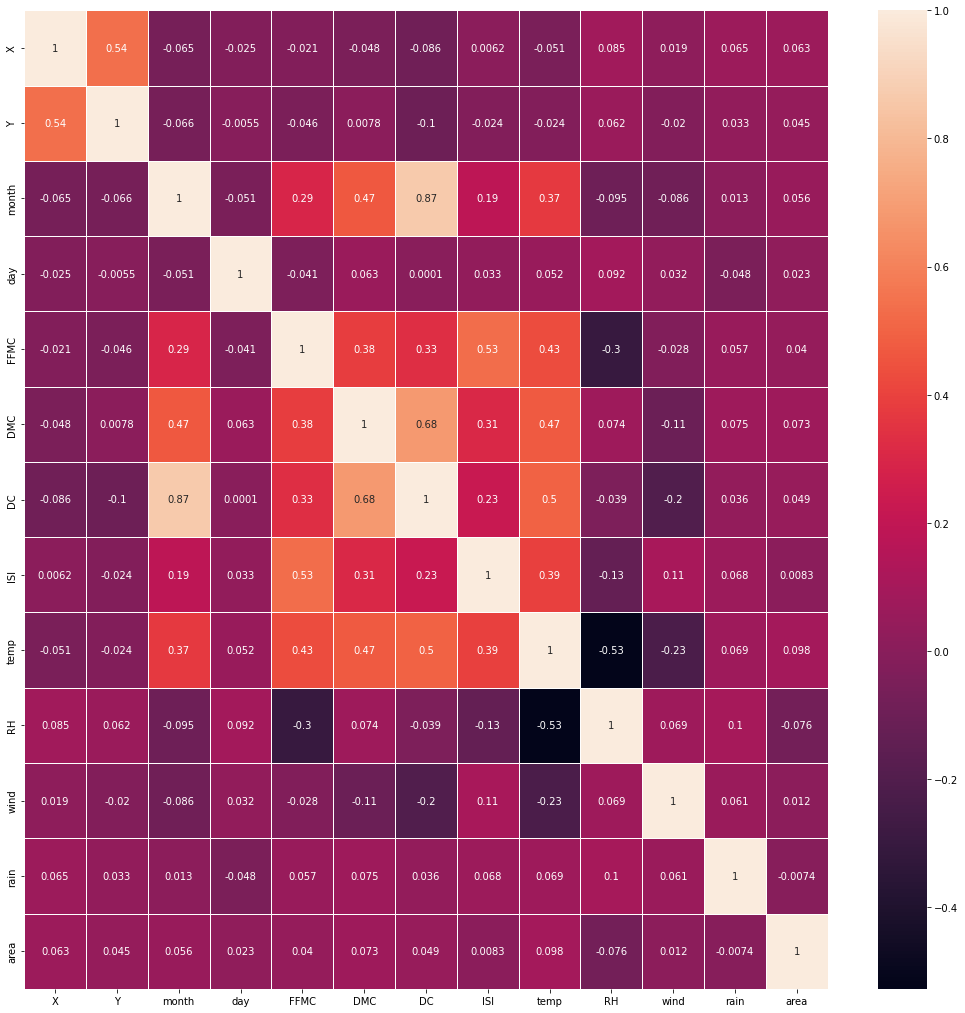

In [568]:
corr = forestdata.corr(method='pearson')
print("Correlation of the Dataset:",corr)

f,ax = plt.subplots(figsize=(18, 18))
print("Plotting correlation:")
sns.heatmap(corr,annot= True, linewidths=.5)
plt.savefig("heatmap")

In [569]:
data = forestdata.values
X = data[:,0:12]
Y = data[:,12]
SCORES = []
MAE = []

In [570]:
print("Linear Regression")
Lreg = LinearRegression()
Lreg.fit(X,Y)
prediction = Lreg.predict(X)
score = explained_variance_score(Y, prediction)
mae = mean_absolute_error(prediction, Y)

print("Score:", score)
SCORES.append(score)
print("Mean Absolute Error:", mae)
MAE.append(mae)

Linear Regression
Score: 0.02397492990181449
Mean Absolute Error: 19.309939164669355


In [571]:
print("Lasso Regression")
lasso = Lasso()
lasso.fit(X,Y)
prediction_lasso = lasso.predict(X)
score = explained_variance_score(Y, prediction_lasso)
mae = mean_absolute_error(prediction_lasso, Y)

print("Score:", score)
SCORES.append(score)

print("Mean Absolute Error:", mae)
MAE.append(mae)


Lasso Regression
Score: 0.02329690087748615
Mean Absolute Error: 19.05490088653006


In [572]:
print("Ridge Regression")
ridge = Ridge()
ridge.fit(X,Y)
prediction_ridge = ridge.predict(X)
score = explained_variance_score(Y, prediction_ridge)
mae = mean_absolute_error(prediction_ridge, Y)

print("Score:", score)
SCORES.append(score)

print("Mean Absolute Error:", mae)
MAE.append(mae)


Ridge Regression
Score: 0.023974828506514334
Mean Absolute Error: 19.307816379295353


In [573]:
print('K-Neighbors Regressor')
knreg = KNeighborsRegressor()
knreg.fit(X,Y)
prediction_knreg = knreg.predict(X)
score = explained_variance_score(Y, prediction_knreg)
mae = mean_absolute_error(prediction_knreg, Y)

print("Score:", score)
SCORES.append(score)

print("Mean Absolute Error:", mae)
MAE.append(mae)


K-Neighbors Regressor
Score: 0.27304294222441383
Mean Absolute Error: 15.509694390715666


In [574]:
print('Random Forest Regressor')
rfreg = RandomForestRegressor()
rfreg.fit(X,Y)
prediction_rfreg = rfreg.predict(X)
score = explained_variance_score(Y, prediction_rfreg)
mae = mean_absolute_error(prediction_rfreg, Y)

print("Score:", score)
SCORES.append(score)

print("Mean Absolute Error:", mae)
MAE.append(mae)


Random Forest Regressor
Score: 0.8275132063297771
Mean Absolute Error: 8.021912597863132


In [575]:
print('Support Vector Regressor')
svr = SVR()
svr.fit(X,Y)
prediction_svr = svr.predict(X)
score = explained_variance_score(Y, prediction_svr)
mae = mean_absolute_error(prediction_svr, Y)

print("Score:", score)
# SCORES.append(score)

print("Mean Absolute Error:", mae)
MAE.append(mae)


Support Vector Regressor
Score: 0.0005028922240570832
Mean Absolute Error: 12.808831971023993


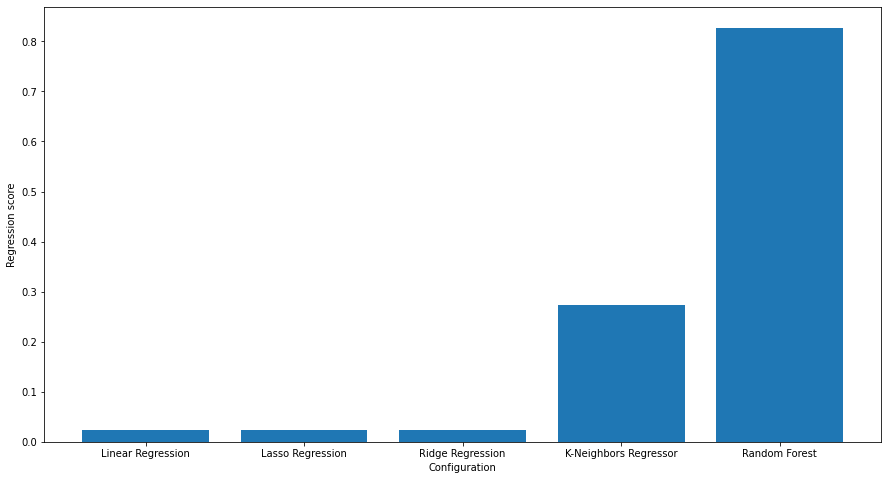

<Figure size 432x288 with 0 Axes>

In [576]:
S = ["Linear Regression", "Lasso Regression", "Ridge Regression", "K-Neighbors Regressor", "Random Forest" ]

# df = pd.DataFrame({"x" : S, "y" : SCORES })
plt.subplots(figsize=(15, 8))
# plt.scatter(df["x"].astype(str), df["y"])
# plt.margins(x=0.5)
# plt.show()
plt.xlabel('Configuration',color='black',fontsize=10)
plt.ylabel('Regression score',color='black',fontsize=10)

plt.bar(S, SCORES)
plt.show()
plt.savefig("scores")

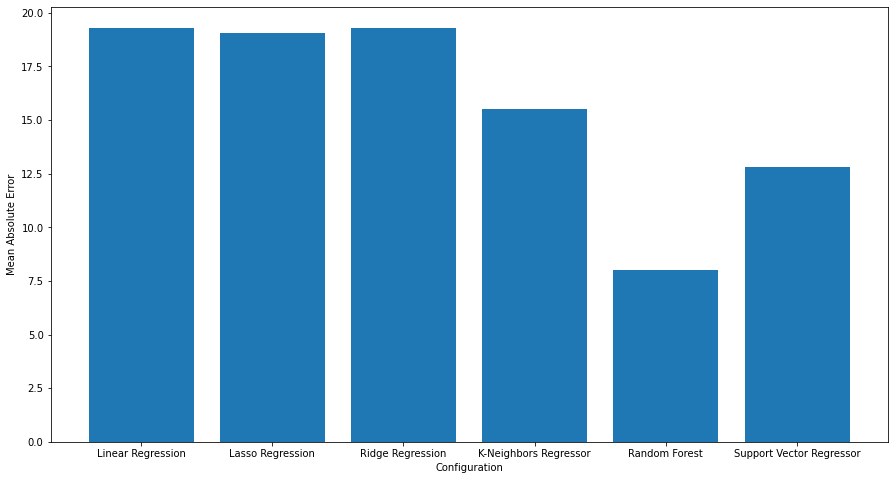

<Figure size 432x288 with 0 Axes>

In [577]:
# df = pd.DataFrame({"x" : S, "y" : MAE })
S = ["Linear Regression", "Lasso Regression", "Ridge Regression", "K-Neighbors Regressor", "Random Forest",  "Support Vector Regressor"]

plt.subplots(figsize=(15, 8))
# plt.scatter(df["x"].astype(str), df["y"])
# plt.margins(x=0.5)
# plt.show()

plt.xlabel('Configuration',color='black',fontsize=10)
plt.ylabel('Mean Absolute Error',color='black',fontsize=10)

plt.bar(S, MAE)
plt.show()
plt.savefig("mae")